In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

with open("Fmat.npz", "r") as f:
    Fmat = np.load('Fmat.npz')['Fmat']
    
with open("permvec.npz", "r") as f:
    permvec = np.load('permvec.npz')['permvec']

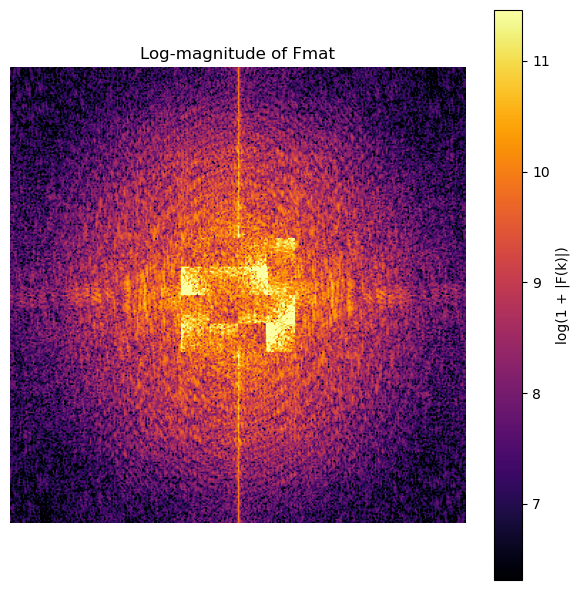

In [59]:
# Before image processing

mag = np.log1p(np.abs(Fmat))

vmin, vmax = np.percentile(mag, (5, 99.5))

plt.figure(figsize=(6, 6))
im = plt.imshow(
    mag,
    cmap='inferno',        
    vmin=vmin,
    vmax=vmax,     
)
plt.title('Log-magnitude of Fmat')
plt.colorbar(im, label='log(1 + |F(k)|)')
plt.axis('off')          
plt.tight_layout()
plt.show()

In [37]:
Fmat_center = Fmat[120:200, 120:200]

# Divide the center into 16 blocks
blocks = []
block_size = 20
num_blocks_side = 4
for k in range(16): 
    i = k // num_blocks_side
    j = k % num_blocks_side
    
    r_start = i * block_size
    c_start = j * block_size
    
    block_k = Fmat_center[r_start : r_start + block_size, 
                          c_start : c_start + block_size]
    blocks.append(block_k)

new_blocks = [None] * 16
for p in range(16):
    index = permvec[p]
    new_blocks[index] = blocks[p].copy()

stacked = np.stack(new_blocks, axis=0)
decrypted_center = (stacked
                    .reshape(4, 4, 20, 20)
                    .transpose(0, 2, 1, 3)
                    .reshape(80, 80))

Fmat_decrypted = np.copy(Fmat)
Fmat_decrypted[120:200, 120:200] = decrypted_center

A4 = np.abs(Fmat_decrypted)

Fmat_shifted = np.fft.ifftshift(Fmat_decrypted)
image_reconstructed = np.fft.ifft2(Fmat_shifted)

A5 = np.abs(image_reconstructed)

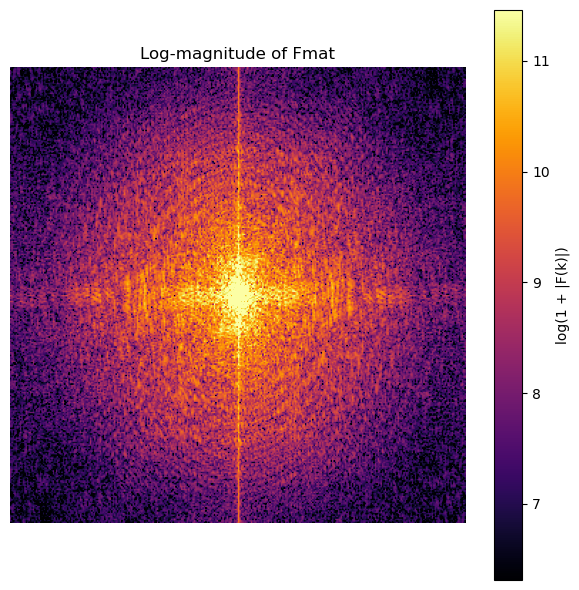

In [61]:
# After image processing

mag = np.log1p(np.abs(A4))

vmin, vmax = np.percentile(mag, (5, 99.5))

plt.figure(figsize=(6, 6))
im = plt.imshow(
    mag,
    cmap='inferno',        
    vmin=vmin,
    vmax=vmax,     
)
plt.title('Log-magnitude of Fmat')
plt.colorbar(im, label='log(1 + |F(k)|)')
plt.axis('off')          
plt.tight_layout()
plt.show()

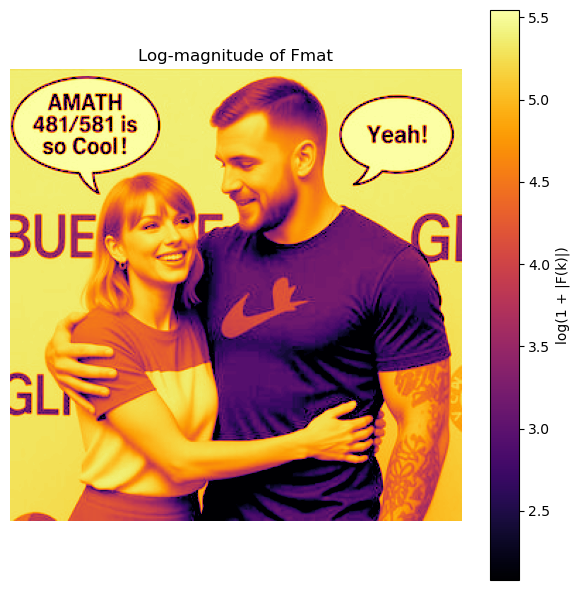

In [63]:
mag = np.log1p(np.abs(A5))

vmin, vmax = np.percentile(mag, (5, 99.5))

plt.figure(figsize=(6, 6))
im = plt.imshow(
    mag,
    cmap='inferno',        
    vmin=vmin,
    vmax=vmax,     
)
plt.title('Log-magnitude of Fmat')
plt.colorbar(im, label='log(1 + |F(k)|)')
plt.axis('off')          
plt.tight_layout()
plt.show()